In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install transformers datasets evaluate --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2399c86287725625ef74c30cebe6e4c42f080f715f5f9fc0da4107364f3fd794
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 41.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import pandas as pd

# Upload CSV file manually
uploaded = files.upload()



Saving all_data (1).csv to all_data (1).csv


In [ ]:
# Assuming the file is named 'feminism_comments.csv'
df = pd.read_csv('all_data (1).csv')  # Change name if needed
df.head()

,Comment,Label
0,সহবাস কইরা দিলা খালাম্মারে,Negative
1,খুব ভাল লাগল আপু আপনার কথা গুলা শুনে,Positive
2,সাহস থাকলে একদিন মেকআপ ছাড়া সামনে আসো তো?,Negative
3,ভাই মালটাকে নাইট ক্লাবে নিয়ে যান একটু😀,Negative
4,"আল্লাহ তা,আলা আমাদের যে হুকুম করেছেন সেইভাবেই ...",Neutral


In [ ]:
# Load dataset
df = pd.read_csv("all_data (1).csv")

# Remove rows where Label is "Neutral"
df = df[df["Label"] != "Neutral"]

# Reset index after filtering
df = df.reset_index(drop=True)

# Show first few rows
print(df.head())
print(df.tail())


                                      Comment     Label
0                  সহবাস কইরা দিলা খালাম্মারে  Negative
1        খুব ভাল লাগল আপু আপনার কথা গুলা শুনে  Positive
2  সাহস থাকলে একদিন মেকআপ ছাড়া সামনে আসো তো?  Negative
3      ভাই মালটাকে নাইট ক্লাবে নিয়ে যান একটু😀  Negative
4                                খুব সুন্দর 👍  Positive
                                      Comment     Label
4635               নারীবাদ আমাদের সকলের জন্য।  Positive
4636  নারীদের স্বপ্ন পূরণের সুযোগ দেয়া উচিত।  Positive
4637              নারীবাদ সমাজে পরিবর্তন আনে।  Positive
4638             নারীদের স্বাবলম্বী করতে হবে।  Positive
4639   নারীবাদ সমাজে ন্যায়বিচার নিশ্চিত করে।  Positive


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
# Add your Bangla stopwords into NLTK
# ✅ Define your Bangla stopwords list
bangla_stopwords = [
    "অতএব", "অথবা", "অনুযায়ী", "অনেক", "অন্য", "অবধি", "অবশ্য", "আমি", "আমাদের", "আমাকে", "আমার",
    "আর", "ই", "ইত্যাদি", "এই", "এ", "এঁদের", "এঁরা", "এখন", "এখানে", "এটি", "এটা", "এদিকে", "এবং",
    "এবার", "এমন", "এমনি", "এর", "এরা", "এল", "এস", "ঐ", "ও", "ওঁদের", "ওঁরা", "ওই", "ওকে", "ওদের", "ওর",
    "ওরা", "কখনও", "করেছে", "করেন", "করতে", "করবে", "করলেন", "করার", "করি", "করিয়ে", "করেছিল", "করেছিলাম",
    "করেছি", "করছেন", "করা", "করে", "কারণ", "কিছু", "কিছুই", "কিন্তু", "কি", "কী", "কেউ", "কেখা", "কেন", "কে",
    "কোন", "কোনও", "ক্ষেত্রে", "খুব", "গিয়ে", "গেছে", "গেল", "গেলে", "চলে", "ছিল", "ছিলেন", "জানায়",
    "জানানো", "জানিয়ে", "জানানোয়", "জানতে", "জানা", "জানেন", "জানলাম", "জানালেন", "জানালে", "জানাই",
    "তখন", "তা", "তাদের", "তাহলে", "তা-ও", "তাকে", "তারা", "তারপর", "তাহার", "তারা", "তার", "তিনিও",
    "তিনজন", "তিনটি", "তিনি", "তুমি", "তোমার", "থাকবে", "থাকেন", "থাকে", "থাকতে", "থাকছে", "থাকা",
    "দিকে", "দিয়েছে", "দিয়েছেন", "দেয়", "দেন", "দিয়ে", "দেখা", "দেখেন", "দেখি", "দেখুন",
    "দ্বারা", "ধরা", "নয়", "না", "নি", "নিজের", "নিজে", "নিতে", "নিয়ে", "নিয়েছে", "নিয়েছেন",
    "নেই", "পক্ষে", "পারি", "পারে", "পেয়েছি", "পেয়েছে", "পেলেন", "পাওয়া", "পাওয়া", "পাওয়ার",
    "পর", "পরে", "প্রতি", "প্রভৃতি", "প্রায়", "ফলে", "বলেছেন", "বললেন", "বলতে", "বলা", "বলে", "বলেন",
    "বা", "বিনা", "বিশেষ", "বেশ", "বেশি", "মতো", "মধ্যে", "যখন", "যদি", "যদিও", "যে", "যেন",
    "যেখানে", "যেমন", "যারা", "র", "রয়েছে", "হয়", "হয়তো", "হয়ে", "হয়নি", "হলো"
]

# ✅ Convert to set for fast lookup
stopwords_bangla = set(bangla_stopwords)

# ✅ Emoji removal function
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# ✅ Preprocessing function
def preprocess(text):
    text = text.lower()
    text = remove_emojis(text)
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)  # keep only Bangla chars + whitespace
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords_bangla]
    return " ".join(tokens)

# 🔥 Example
sample = "খুব ভাল লাগল আপু আপনার কথা গুলা শুনে 😀!"
print("Before:", sample)
print("After:", preprocess(sample))

# Apply preprocessing to the Comment column
df["Comment"] = df["Comment"].apply(preprocess)

# Check first 10 rows again
print(df.head(10))

Before: খুব ভাল লাগল আপু আপনার কথা গুলা শুনে 😀!
After: ভাল লাগল আপু আপনার কথা গুলা শুনে
                                             Comment     Label
0                         সহবাস কইরা দিলা খালাম্মারে  Negative
1                   ভাল লাগল আপু আপনার কথা গুলা শুনে  Positive
2          সাহস থাকলে একদিন মেকআপ ছাড়া সামনে আসো তো  Negative
3              ভাই মালটাকে নাইট ক্লাবে নিয়ে যান একটু  Negative
4                                             সুন্দর  Positive
5                                   ওহ আরেকজন খদ্দের  Negative
6                  মাশাআল্লাহ লেখাটা পড়ে ভালো লাগলো  Positive
7  অসাধারণ লেখা কবিকে অসংখ্য ধন্যবাদ আগামী দিনের ...  Positive
8  আপনার মুখে আঞ্চলিক ভাষার কবিতা গুলো শুনতে ভালো...  Positive
9                              মাশাআল্লাহ দারুন হইছে  Positive


In [ ]:
# Cleaned text column
df['cleaned'] = df['Comment'].astype(str).apply(preprocess)

# Show results
df[['Comment', 'cleaned', 'Label']].head()


,Comment,cleaned,Label
0,সহবাস কইরা দিলা খালাম্মারে,সহবাস কইরা দিলা খালাম্মারে,Negative
1,ভাল লাগল আপু আপনার কথা গুলা শুনে,ভাল লাগল আপু আপনার কথা গুলা শুনে,Positive
2,সাহস থাকলে একদিন মেকআপ ছাড়া সামনে আসো তো,সাহস থাকলে একদিন মেকআপ ছাড়া সামনে আসো তো,Negative
3,ভাই মালটাকে নাইট ক্লাবে নিয়ে যান একটু,ভাই মালটাকে নাইট ক্লাবে নিয়ে যান একটু,Negative
4,সুন্দর,সুন্দর,Positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned']).toarray()

print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (4640, 1815)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['Label'])  # Encodes labels to 0,1,2
df[['Label', 'encoded_label']].drop_duplicates()


,Label,encoded_label
0,Negative,0
1,Positive,1


In [ ]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned'].tolist(),
    df['encoded_label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['encoded_label']
)


In [ ]:
!pip install datasets transformers evaluate --quiet

from datasets import Dataset
import pandas as pd

# Prepare dictionary for HuggingFace
train_dict = {'text': train_texts, 'label': train_labels}
test_dict = {'text': test_texts, 'label': test_labels}

train_dataset = Dataset.from_dict(train_dict)
test_dataset = Dataset.from_dict(test_dict)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import torch
import numpy as np
from sklearn.metrics import matthews_corrcoef, fbeta_score, log_loss

# Load metrics from 🤗 evaluate
accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    # Hugging Face metrics
    acc = accuracy.compute(predictions=preds, references=labels)["accuracy"]
    prec = precision.compute(predictions=preds, references=labels, average='macro')["precision"]
    rec = recall.compute(predictions=preds, references=labels, average='macro')["recall"]
    f1_macro = f1.compute(predictions=preds, references=labels, average='macro')["f1"]

    # Extra metrics (scikit-learn)
    f2_macro = fbeta_score(labels, preds, beta=2, average="macro")
    mcc = matthews_corrcoef(labels, preds)
    lloss = log_loss(labels, torch.nn.functional.softmax(torch.tensor(logits), dim=-1).numpy())

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1_macro,
        "f2": f2_macro,
        "mcc": mcc,
        "log_loss": lloss,
    }


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def train_transformer(model_name, checkpoint, train_dataset, test_dataset):
    print(f"\n📘 Training model: {model_name}")

    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(checkpoint)

    # Tokenize text
    def tokenize_function(example):
        return tokenizer(example['text'], padding='max_length', truncation=True, max_length=128)

    tokenized_train = train_dataset.map(tokenize_function, batched=True)
    tokenized_test = test_dataset.map(tokenize_function, batched=True)

    # Load pre-trained transformer model for classification
    model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=f"./results/{model_name}",
        learning_rate=2e-5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir=f"./logs/{model_name}",
    )

    # Initialize trainer|
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_test,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()
    return trainer

In [ ]:
model_checkpoints = {
    "BanglaBERT-BUET": "csebuetnlp/banglabert",
    "MBERT": "bert-base-multilingual-cased",              # Multilingual BERT
    "BanglaBERT": "sagorsarker/bangla-bert-base",         # Bangla BERT
    "XLM-R": "xlm-roberta-base",                          # Multilingual RoBERTa
                         # Multilingual Translation model (can be fine-tuned for classification too)
}


# To store all trained trainers
trained_models = {}


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [ ]:
for model_name, checkpoint in model_checkpoints.items():
    trainer = train_transformer(model_name, checkpoint, train_dataset, test_dataset)
    trained_models[model_name] = trainer



📘 Training model: BanglaBERT-BUET


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/3712 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
500,0.253900
1000,0.126100


model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]


📘 Training model: MBERT


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Map:   0%|          | 0/3712 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
500,0.398500
1000,0.251900



📘 Training model: BanglaBERT


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/3712 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
500,0.342600
1000,0.177700



📘 Training model: XLM-R


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Map:   0%|          | 0/3712 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
500,0.466000
1000,0.359200


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import torch


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)

    # Accuracy, Precision, Recall, F1
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)

    # ROC-AUC
    try:
        probs = logits[:, 1]  # probability of positive class
        roc_auc = roc_auc_score(labels, probs)
    except:
        roc_auc = 0.0

    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc
    }


In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, log_loss, fbeta_score, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
import torch
import torch.nn.functional as F

def calculate_mcc_from_conf_matrix(y_true, y_pred, labels=[0, 1]):
    """Calculates Matthews Correlation Coefficient from a confusion matrix for binary case."""
    # Ensure labels are within the expected range
    mask = np.isin(y_true, labels) & np.isin(y_pred, labels)
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]

    if len(y_true_filtered) == 0:
        return np.nan # Cannot compute MCC if no valid samples remain

    # Compute confusion matrix for the specified labels
    cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=labels)

    if cm.shape != (2, 2):
         # This should not happen if labels=[0, 1] and filtering is correct, but as a safeguard
         return np.nan

    tn, fp, fn, tp = cm.ravel()

    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    if denominator == 0:
        return 0 # MCC is 0 when denominator is 0 (perfect prediction or no positive/negative cases)
    else:
        return numerator / denominator


def evaluate_model(model_name, trainer, train_dataset, test_dataset, label_names):
    print(f"\n📘 Evaluation for {model_name}")

    # Tokenizer
    tokenizer = AutoTokenizer.from_pretrained(trainer.model.name_or_path)

    # Tokenize datasets
    train_tokenized = train_dataset.map(
        lambda x: tokenizer(x['text'], padding='max_length', truncation=True, max_length=128),
        batched=True
    )
    test_tokenized = test_dataset.map(
        lambda x: tokenizer(x['text'], padding='max_length', truncation=True, max_length=128),
        batched=True
    )

    # Predictions (Train)
    train_preds = trainer.predict(train_tokenized)
    y_train_true = train_preds.label_ids
    y_train_pred = np.argmax(train_preds.predictions, axis=1)
    train_logits = torch.tensor(train_preds.predictions)


    # Predictions (Test)
    test_preds = trainer.predict(test_tokenized)
    y_test_true = test_preds.label_ids
    y_test_pred = np.argmax(test_preds.predictions, axis=1)
    test_logits = torch.tensor(test_preds.predictions)


    # Classification report (test)
    report = classification_report(y_test_true, y_test_pred, target_names=label_names, digits=4)
    print(report)

    # Confusion Matrix (test)
    cm = confusion_matrix(y_test_true, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ROC Curve (binary, test)
    # Assuming binary classification with labels 0 and 1
    if len(label_names) == 2:
        # Use predictions for the two classes for ROC curve
        y_prob = torch.nn.functional.softmax(test_logits[:, :2], dim=-1).numpy()
        # Use the probability of the positive class (class 1)
        y_prob_positive = y_prob[:, 1]
        fpr, tpr, _ = roc_curve(y_test_true, y_prob_positive)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"{model_name} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f"ROC Curve - {model_name}")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()
        print(f"AUC (binary, test) = {roc_auc:.4f}")
    else:
        # Handle multi-class ROC if needed in the future
        y_prob = test_preds.predictions
        y_true_bin = label_binarize(y_test_true, classes=np.unique(y_test_true))
        try:
             roc_auc = roc_auc_score(y_true_bin, y_prob, average="macro", multi_class="ovr")
             print(f"AUC (macro, test) = {roc_auc:.4f}")
        except:
            roc_auc = None


    # Metrics
    # Calculate binary cross-entropy loss manually
    # Ensure true labels are float for BCEWithLogitsLoss
    train_loss = F.binary_cross_entropy_with_logits(train_logits[:, 1], torch.tensor(y_train_true, dtype=torch.float32)).item()
    test_loss = F.binary_cross_entropy_with_logits(test_logits[:, 1], torch.tensor(y_test_true, dtype=torch.float32)).item()

    # Calculate MCC from confusion matrix
    train_mcc = calculate_mcc_from_conf_matrix(y_train_true, y_train_pred, labels=[0, 1])
    test_mcc = calculate_mcc_from_conf_matrix(y_test_true, y_test_pred, labels=[0, 1])


    results = {
        "model": model_name,
        # Accuracy
        "train_accuracy": (y_train_true == y_train_pred).mean(),
        "test_accuracy": (y_test_true == y_test_pred).mean(),

        # Log Loss (using binary cross-entropy)
        "train_log_loss": train_loss,
        "test_log_loss": test_loss,

        # MCC
        "train_mcc": train_mcc,
        "test_mcc": test_mcc,

        # F1 and F2
        "test_f1_macro": fbeta_score(y_test_true, y_test_pred, beta=1, average="macro"),
        "test_f2_macro": fbeta_score(y_test_true, y_test_pred, beta=2, average="macro"),
    }

    print("\n✅ Evaluation Results:")
    for k, v in results.items():
        if isinstance(v, float):
            print(f"{k}: {v:.4f}")
        else:
            print(f"{k}: {v}")

    return results


📘 Evaluation for BanglaBERT-BUET


Map:   0%|          | 0/3712 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

    Positive     0.9440    0.9542    0.9491       459
    Negative     0.9547    0.9446    0.9496       469

    accuracy                         0.9494       928
   macro avg     0.9494    0.9494    0.9494       928
weighted avg     0.9494    0.9494    0.9494       928



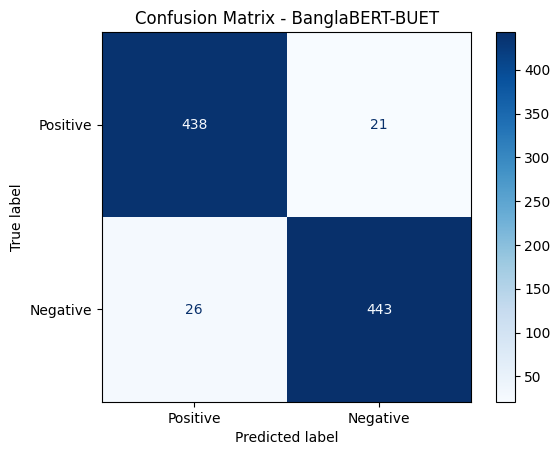

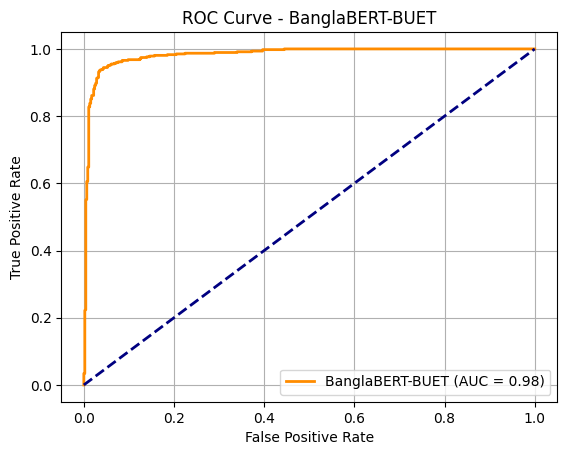

AUC (binary, test) = 0.9831

✅ Evaluation Results:
model: BanglaBERT-BUET
train_accuracy: 0.9908
test_accuracy: 0.9494
train_log_loss: 0.0673
test_log_loss: 0.1773
train_mcc: 0.9817
test_mcc: 0.8988
test_f1_macro: 0.9494
test_f2_macro: 0.9494

📘 Evaluation for MBERT


Map:   0%|          | 0/3712 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

    Positive     0.9226    0.9085    0.9155       459
    Negative     0.9118    0.9254    0.9185       469

    accuracy                         0.9170       928
   macro avg     0.9172    0.9169    0.9170       928
weighted avg     0.9171    0.9170    0.9170       928



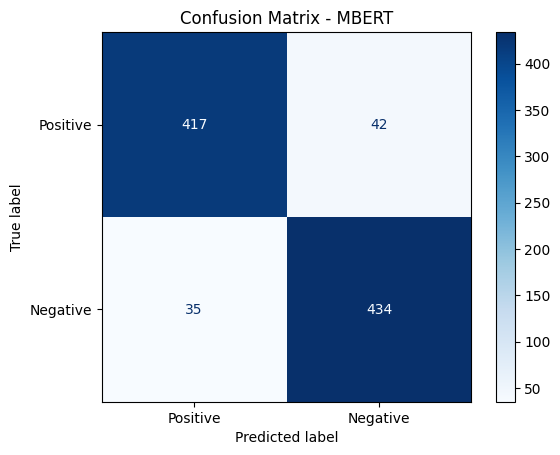

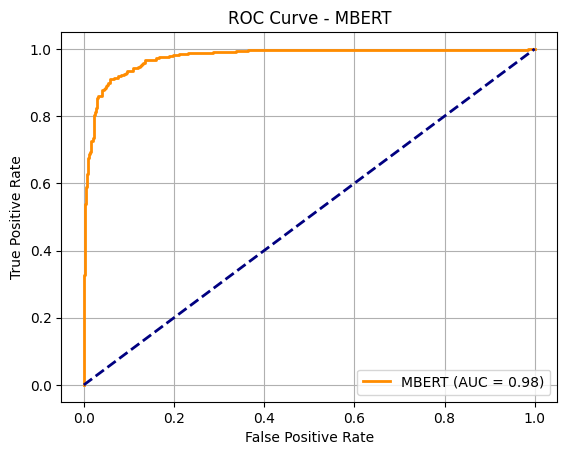

AUC (binary, test) = 0.9765

✅ Evaluation Results:
model: MBERT
train_accuracy: 0.9763
test_accuracy: 0.9170
train_log_loss: 0.1007
test_log_loss: 0.2351
train_mcc: 0.9526
test_mcc: 0.8341
test_f1_macro: 0.9170
test_f2_macro: 0.9169

📘 Evaluation for BanglaBERT


Map:   0%|          | 0/3712 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

    Positive     0.9152    0.9172    0.9162       459
    Negative     0.9188    0.9168    0.9178       469

    accuracy                         0.9170       928
   macro avg     0.9170    0.9170    0.9170       928
weighted avg     0.9170    0.9170    0.9170       928



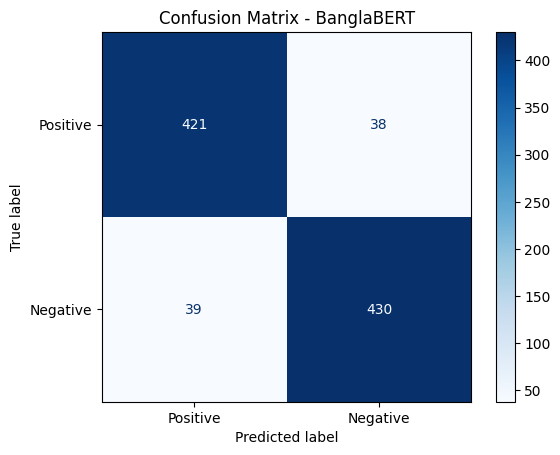

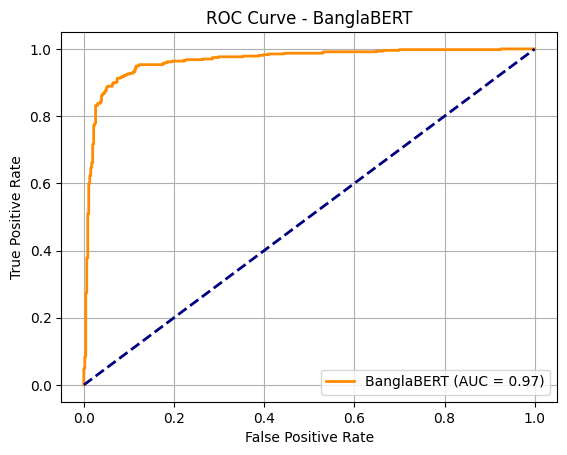

AUC (binary, test) = 0.9651

✅ Evaluation Results:
model: BanglaBERT
train_accuracy: 0.9892
test_accuracy: 0.9170
train_log_loss: 0.0442
test_log_loss: 0.2849
train_mcc: 0.9784
test_mcc: 0.8340
test_f1_macro: 0.9170
test_f2_macro: 0.9170

📘 Evaluation for XLM-R


Map:   0%|          | 0/3712 [00:00<?, ? examples/s]

Map:   0%|          | 0/928 [00:00<?, ? examples/s]

              precision    recall  f1-score   support

    Positive     0.9298    0.9237    0.9268       459
    Negative     0.9258    0.9318    0.9288       469

    accuracy                         0.9278       928
   macro avg     0.9278    0.9278    0.9278       928
weighted avg     0.9278    0.9278    0.9278       928



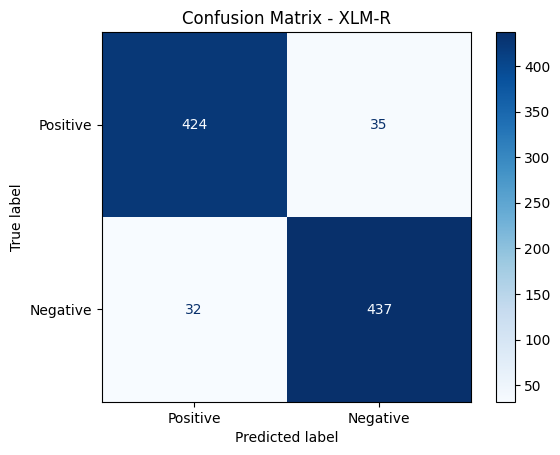

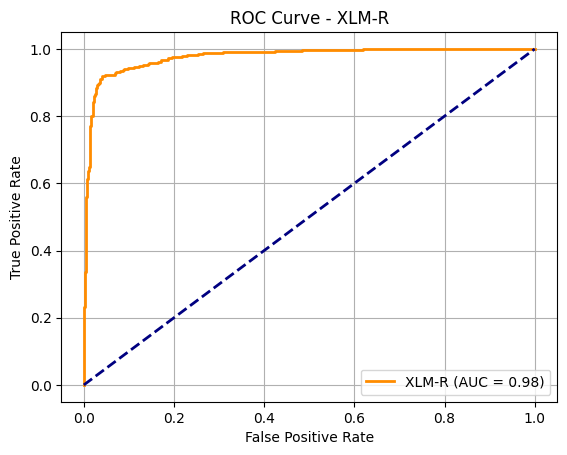

AUC (binary, test) = 0.9778

✅ Evaluation Results:
model: XLM-R
train_accuracy: 0.9607
test_accuracy: 0.9278
train_log_loss: 0.1415
test_log_loss: 0.2230
train_mcc: 0.9213
test_mcc: 0.8556
test_f1_macro: 0.9278
test_f2_macro: 0.9278


In [ ]:
# Label list
label_names = ['Positive','Negative']

# Collect metrics
all_metrics = []

for model_name, trainer in trained_models.items():
    metrics = evaluate_model(model_name, trainer, train_dataset, test_dataset, label_names)
    all_metrics.append(metrics)